In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [37]:
dataset.head()  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
dataset.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
# Convert TotalCharges to numeric (force errors to NaN)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

# Handle missing values (fill with median)
dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5888\121897457.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['TotalCharges'].fillna(dataset['TotalCharges'].median(), inplace=True)


In [41]:
# Drop CustomerID (not useful)
dataset.drop('customerID', axis=1, inplace=True)

# Convert Yes/No columns into 0/1
dataset.replace({'Yes': 1, 'No': 0}, inplace=True)



C:\Users\HP\AppData\Local\Temp\ipykernel_5888\1237536152.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'Yes': 1, 'No': 0}, inplace=True)


In [42]:
from sklearn.preprocessing import LabelEncoder




In [43]:
le = LabelEncoder()
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = dataset[col].astype(str)
# Loop through all object-type columns (categorical columns)
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = le.fit_transform(dataset[col])

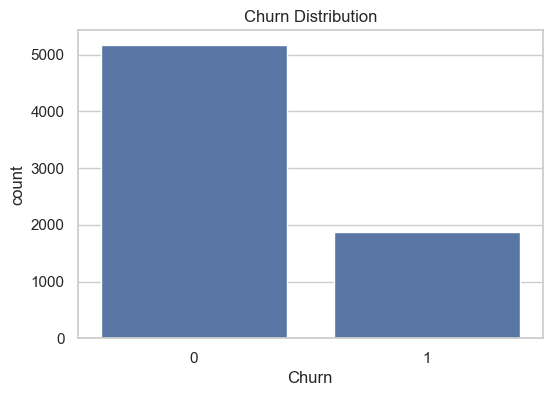

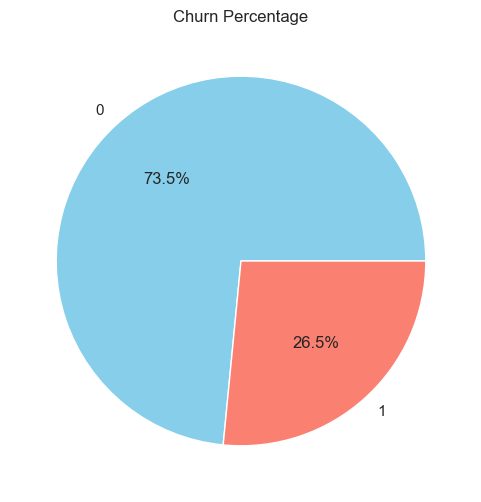

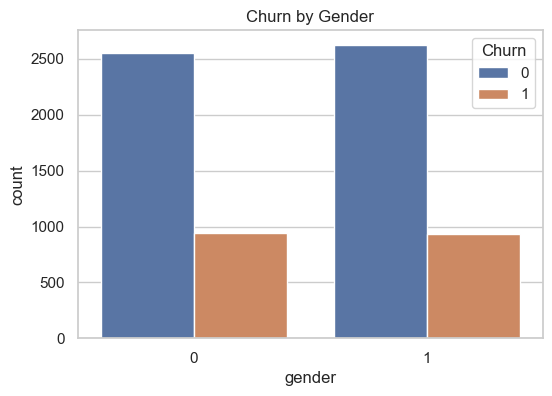

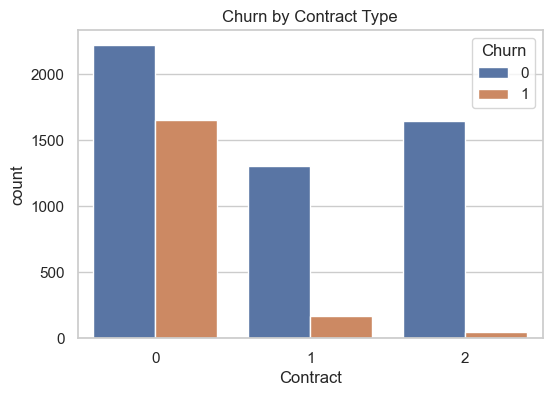

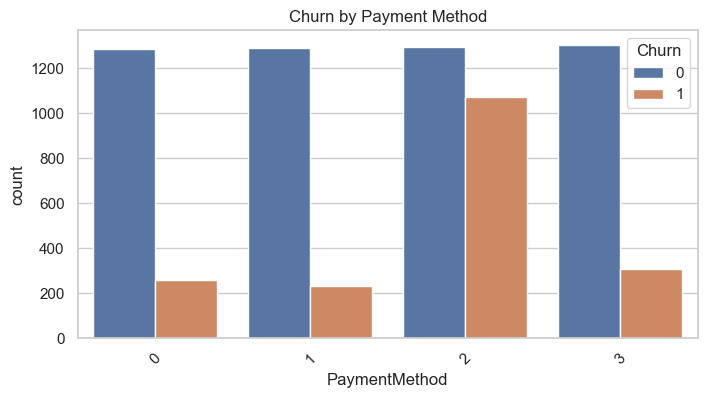

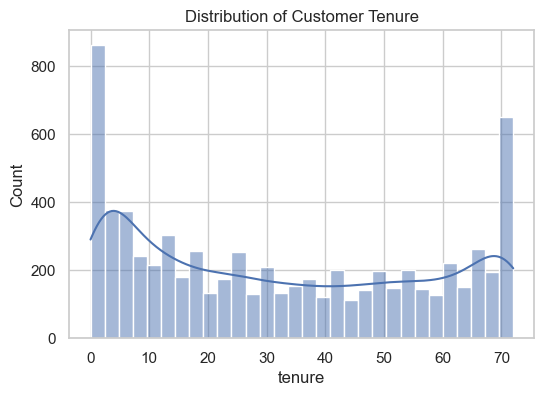

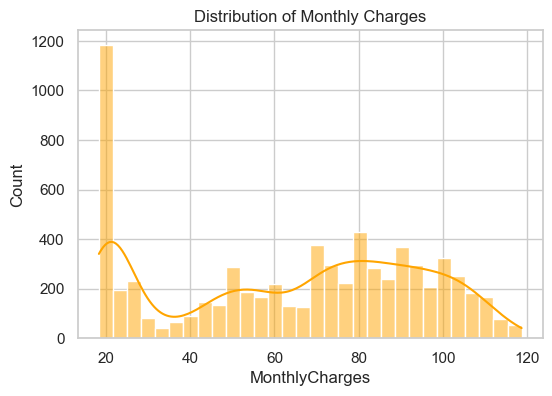

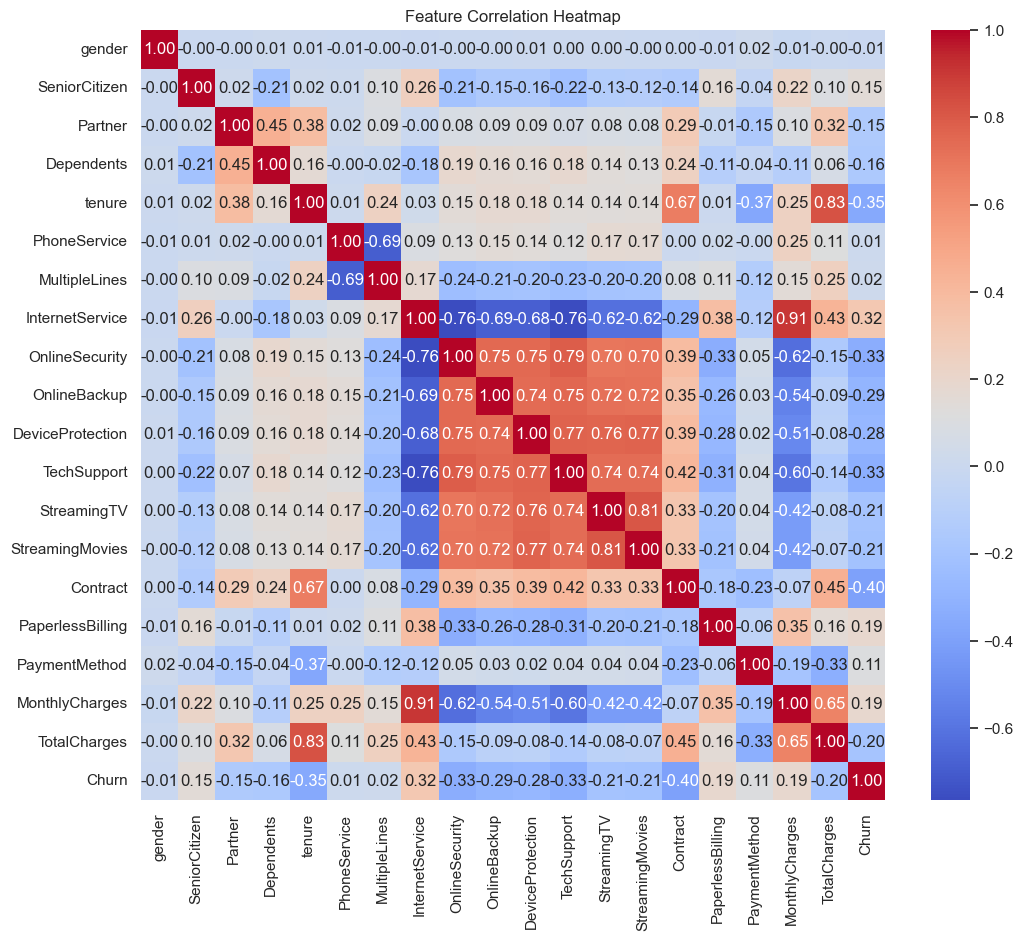

In [44]:
sns.set(style="whitegrid")

# 1️⃣ Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=dataset)
plt.title("Churn Distribution")
plt.show()

# 2️⃣ Churn % Pie Chart
plt.figure(figsize=(6,6))
dataset['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title("Churn Percentage")
plt.ylabel('')
plt.show()

# 3️⃣ Churn vs Gender
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=dataset)
plt.title("Churn by Gender")
plt.show()

# 4️⃣ Churn vs Contract Type
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=dataset)
plt.title("Churn by Contract Type")
plt.show()

# 5️⃣ Churn vs Payment Method
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=dataset)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()

# 6️⃣ Distribution of Tenure
plt.figure(figsize=(6,4))
sns.histplot(dataset['tenure'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.show()

# 7️⃣ Monthly Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(dataset['MonthlyCharges'], bins=30, kde=True, color='orange')
plt.title("Distribution of Monthly Charges")
plt.show()

# 8️⃣ Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

# 1️⃣ Separate features (X) and target (y)
X = dataset.drop("Churn", axis=1)   # all columns except target
y = dataset["Churn"]                # target column

# 2️⃣ Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3️⃣ Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 19)
X_test shape: (1409, 19)
y_train shape: (5634,)
y_test shape: (1409,)
